In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
sns.set()


In [6]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_def30b55e7c447dbb51d8487d41e3f08 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ZqZIznGtWqwD7FVKOxFBOMpff7DyOfLLCtwT-hRNkDJu',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_def30b55e7c447dbb51d8487d41e3f08.get_object(Bucket='caraccidentseverity-donotdelete-pr-yq5jzds71c4pun',Key='US_Accidents_June20.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
month_names = dict(enumerate(calendar.month_abbr))
day_names = dict(enumerate(calendar.day_name))

In [8]:
df_data_1.columns



Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
df_data_1['Start_Time'] = pd.to_datetime(df_data_1['Start_Time'])
df_data_1['End_Time'] = pd.to_datetime(df_data_1['End_Time'])
df_data_1['Year'] = df_data_1['Start_Time'].dt.year
df_data_1['Hour'] = df_data_1['Start_Time'].dt.hour
df_data_1['Day'] = df_data_1['Start_Time'].dt.dayofweek
df_data_1['DayName'] = df_data_1['Start_Time'].dt.weekday_name
df_data_1['Month'] = df_data_1['Start_Time'].dt.month

In [10]:
df = df_data_1[(df_data_1['Year']>2015) & (df_data_1['Year']<2020)]

Text(0.5, 48.50000000000006, 'Factor (Year)')

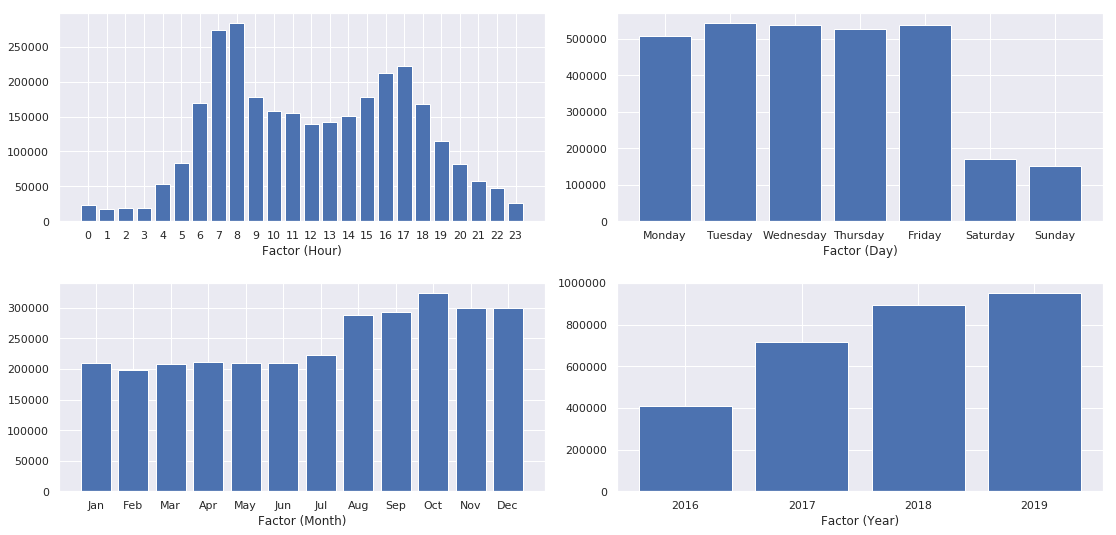

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
fig.tight_layout(pad=3)

hours = df.groupby('Hour').size()
ax1.bar(hours.index, hours)
ax1.set_xticks(hours.index)
ax1.set_xlabel('Factor (Hour)')

days = df.groupby('Day').size()
ax2.bar(days.index, days)
ax2.set_xticks(days.index)
ax2.set_xticklabels([day_names[i] for i in days.index])
ax2.set_xlabel('Factor (Day)')

months = df.groupby('Month').size()
ax3.bar(months.index, months)
ax3.set_xticks(months.index)
ax3.set_xticklabels([month_names[i] for i in months.index])
ax3.set_xlabel('Factor (Month)')

years = df.groupby('Year').size()
ax4.bar(years.index, years)
ax4.set_xticks(years.index)
ax4.set_xlabel('Factor (Year)')

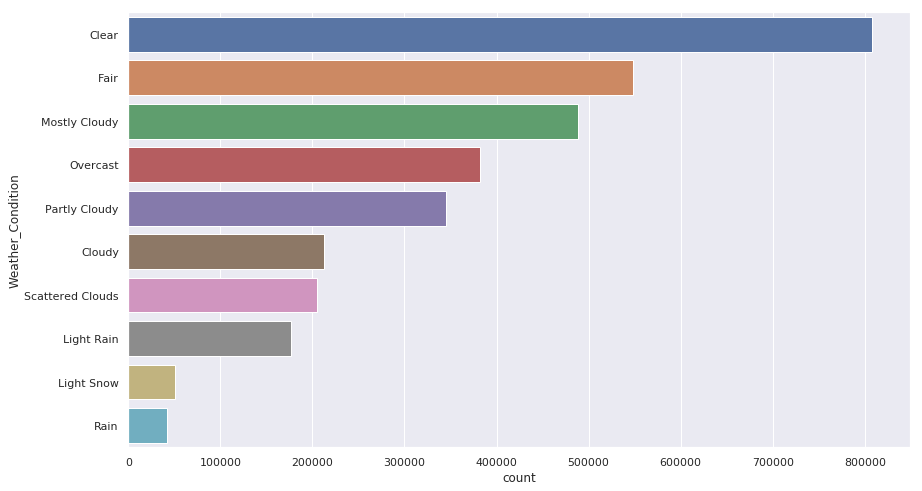

In [12]:
plt.figure(figsize=(14, 8))
sns.countplot(y='Weather_Condition', data=df_data_1, order=df_data_1['Weather_Condition'].value_counts().iloc[:10].index)

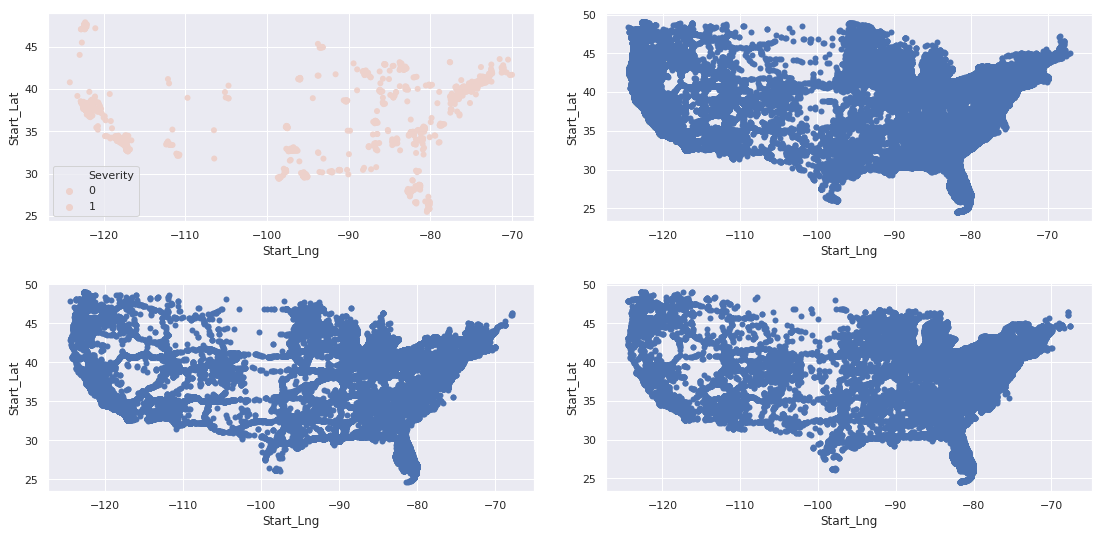

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
fig.tight_layout(pad=3)

severity_1 = df[df['Severity']==1]
sns.scatterplot(x ='Start_Lng',y='Start_Lat', data=severity_1, hue='Severity',linewidth=0, ax=ax1)

severity_2 = df[df['Severity']==2]
sns.scatterplot(x ='Start_Lng',y='Start_Lat', data=severity_2, linewidth=0,ax=ax2)

severity_3 = df[df['Severity']==3]
sns.scatterplot(x ='Start_Lng',y='Start_Lat', data=severity_3,linewidth=0,ax=ax3)

severity_4 = df[df['Severity']==4]
sns.scatterplot(x ='Start_Lng',y='Start_Lat', data=severity_4,linewidth=0,ax=ax4)

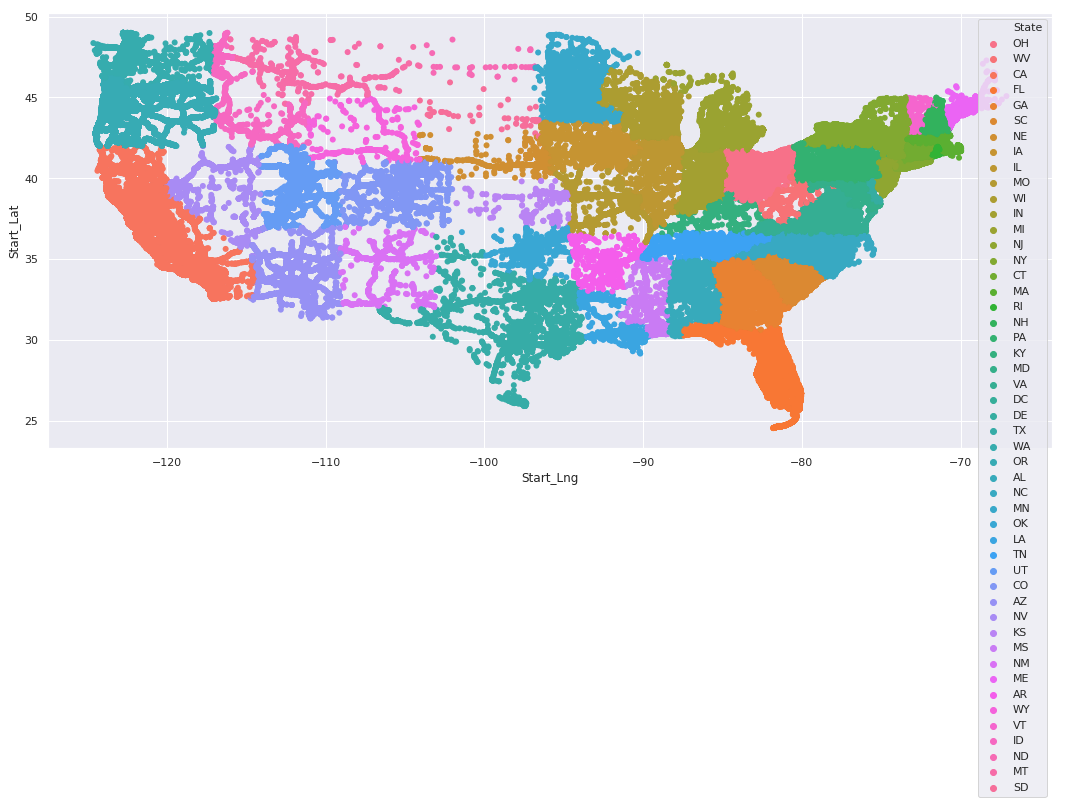

In [14]:
plt.figure(figsize=(18, 8))
sns.scatterplot(x ='Start_Lng',y='Start_Lat', data=df, linewidth=0, hue='State')

In [15]:
states = df_data_1.State.unique()


In [17]:
count_by_state=[]
for i in df_data_1.State.unique():
    count_by_state.append(df_data_1[df_data_1['State']==i].count()['ID'])
    

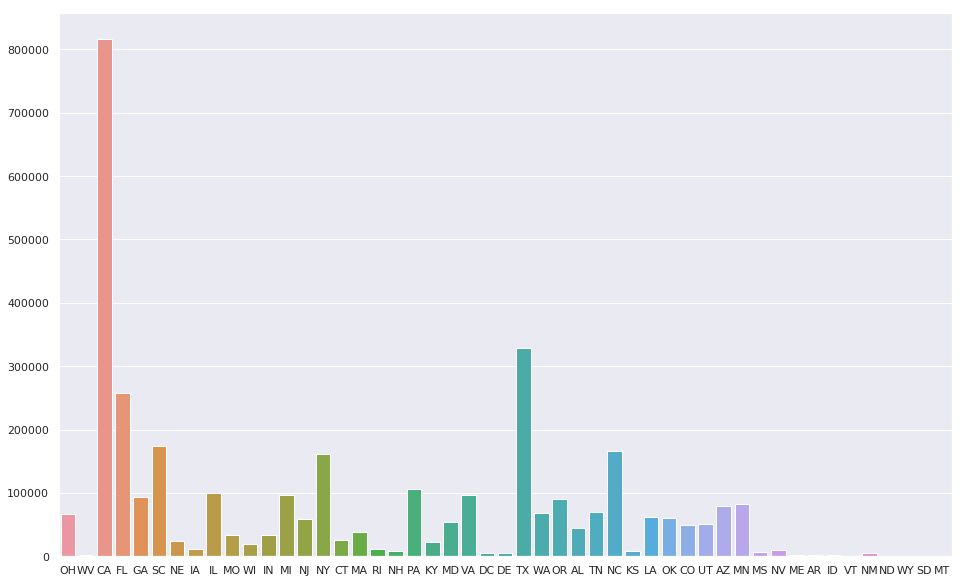

In [18]:
plt.figure(figsize=(16,10))
sns.barplot(states, count_by_state)

In [20]:
severity_1_by_state = []
severity_2_by_state = []
severity_3_by_state = []
severity_4_by_state = []
for i in states:
    severity_1_by_state.append(df_data_1[(df_data_1['Severity']==1)&(df_data_1['State']==i)].count()['ID'])
    severity_2_by_state.append(df_data_1[(df_data_1['Severity']==2)&(df_data_1['State']==i)].count()['ID'])
    severity_3_by_state.append(df_data_1[(df_data_1['Severity']==3)&(df_data_1['State']==i)].count()['ID'])
    severity_4_by_state.append(df_data_1[(df_data_1['Severity']==4)&(df_data_1['State']==i)].count()['ID'])

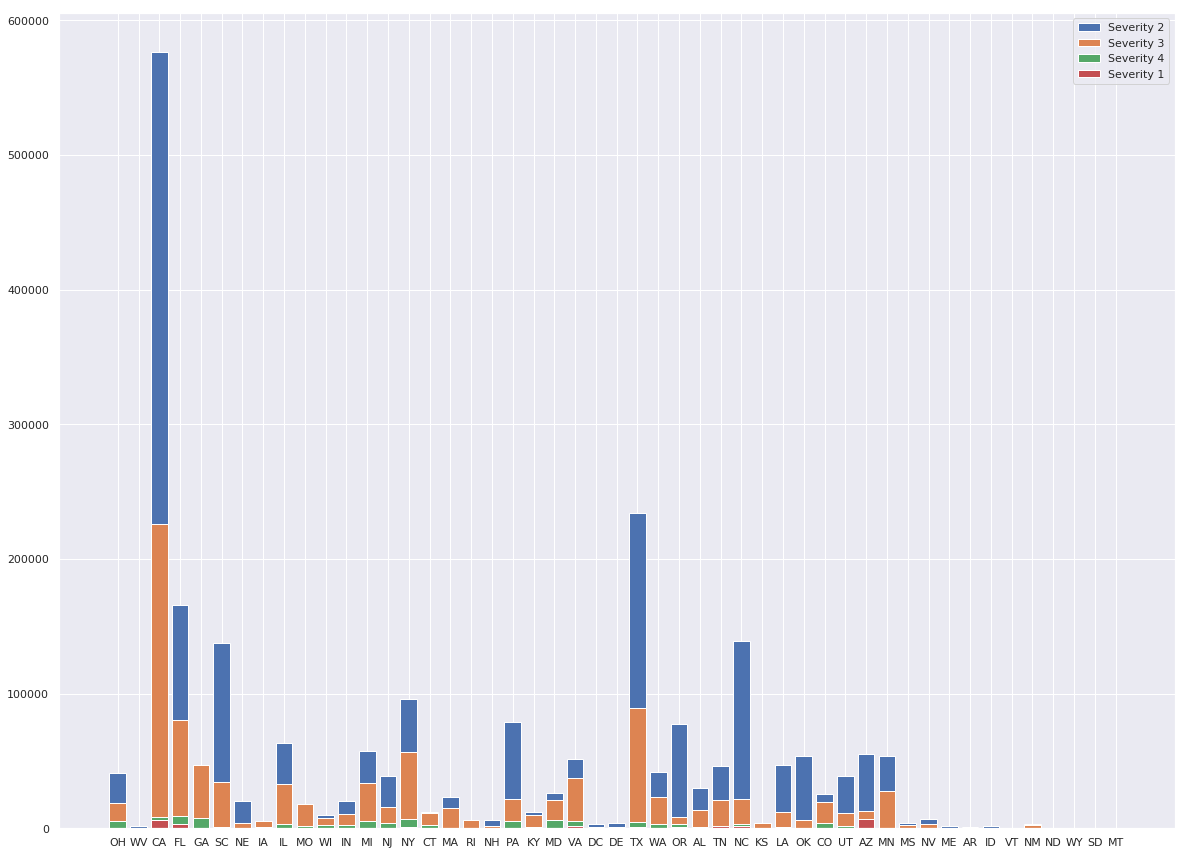

In [21]:
plt.figure(figsize=(20,15))

plt.bar(states, severity_2_by_state, label='Severity 2')
plt.bar(states, severity_3_by_state, label='Severity 3')
plt.bar(states, severity_4_by_state, label='Severity 4')
plt.bar(states, severity_1_by_state, label='Severity 1')


plt.legend()

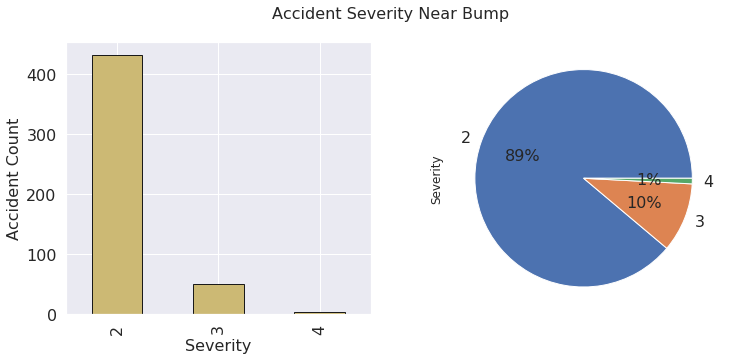

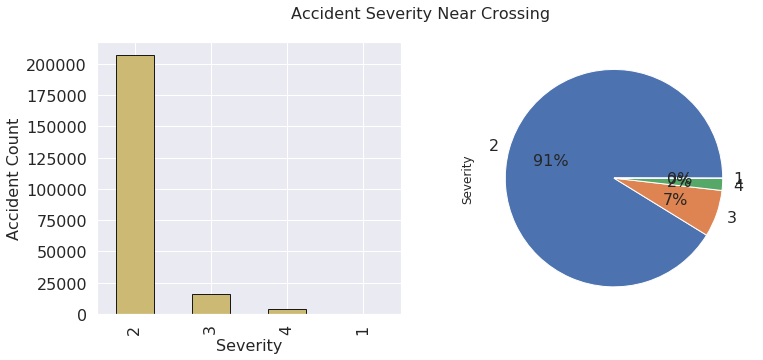

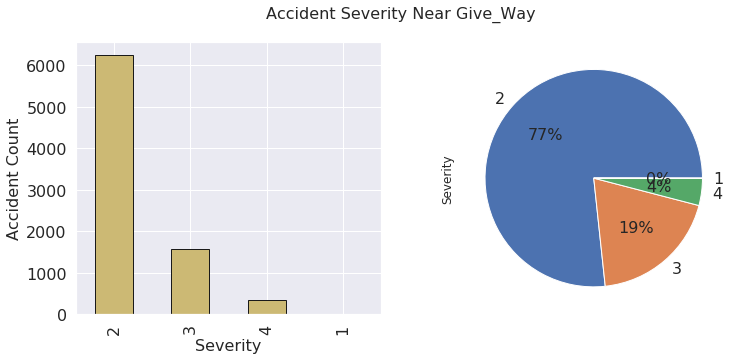

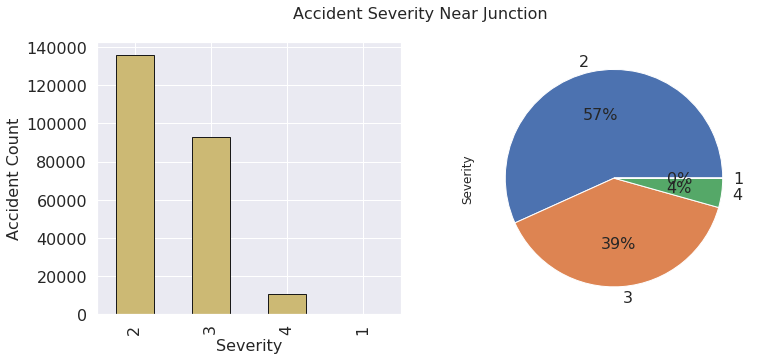

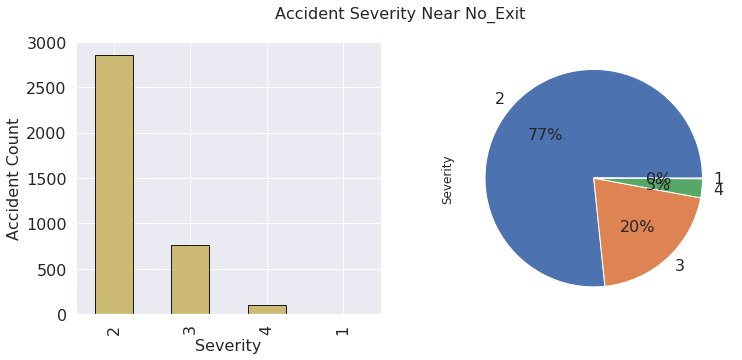

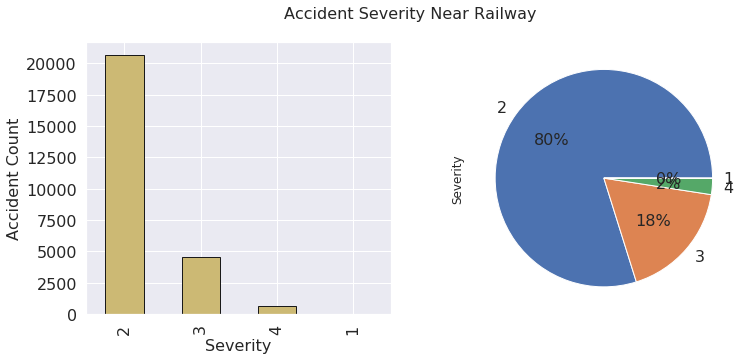

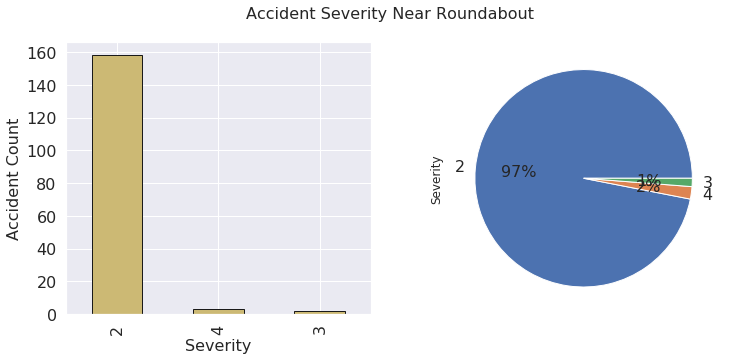

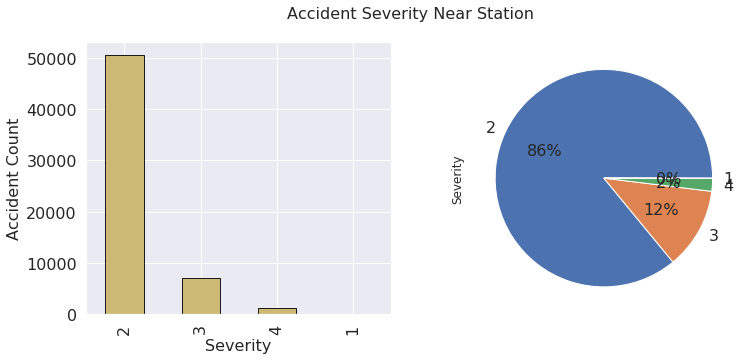

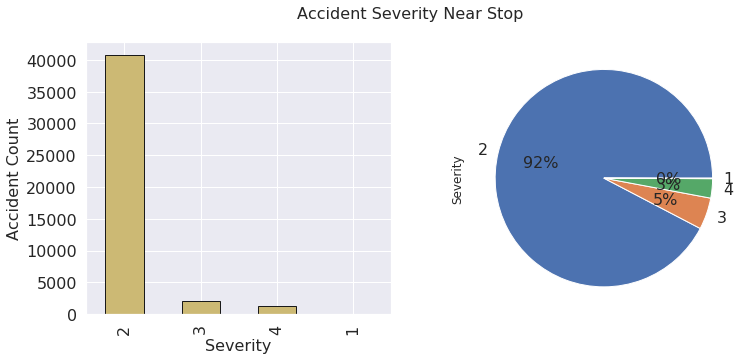

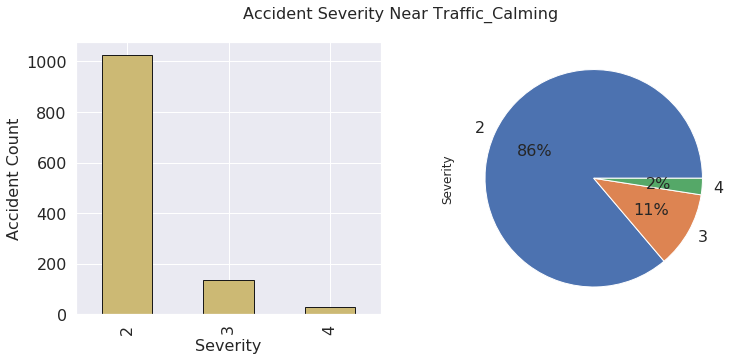

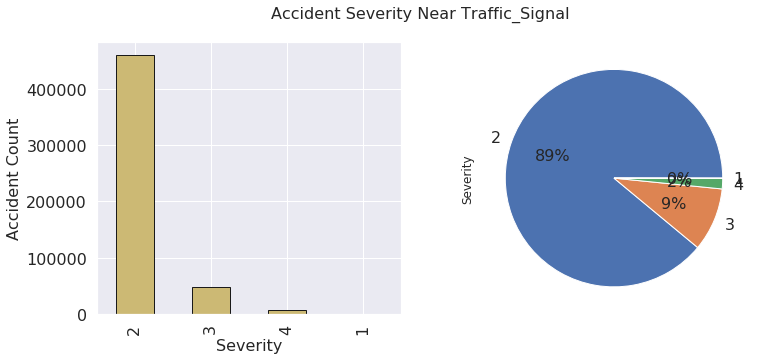

In [23]:
for s in ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']:
    # check if infrastructure type is found in any record 
    if (df[s] == True).sum() > 0:
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + s,fontsize=16)
        plt.subplot(1,2,1)
        df.loc[df[s] == True]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        df.loc[df[s] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)